In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import tqdm
import time
import os.path
import pdb
import argparse
import sys
from shapes_loader import *
from base_model import *


In [18]:
# INPUT: model_1 and model_2 are SuperPointModel
# INPUT: model_1_name and model_2_name are strings of the model name 
def cross_comparison(img_dir, model_1, model_1_name, model_2, model_２_name, threshold):
    
    imgsList = os.listdir(img_dir)
    clr_imgs = [Image.open(img_dir+img).resize((400,300),Image.ANTIALIAS) for img in imgsList]
    imgs = torch.tensor(np.asarray([np.array(Image.open(img_dir+img).resize((400,300),Image.ANTIALIAS).convert('1')) for img in imgsList], dtype='float')).to(DEVICE)  
    
    h,w = imgs[0].shape
    ipt_1, desc_1 = model_1(imgs.float().unsqueeze(1).to(DEVICE))
    
    ipt_2, desc_2 = model_2(imgs.float().unsqueeze(1).to(DEVICE))
    
    #ipt bnum x 65 x hc x wc
    bnum, dims, hc, wc = ipt_1.shape
    
    # first image
    ipt_sm_1 = criterion(ipt_1)
    ipt_sm_1 = ipt_sm_1[:,:-1,:,:]
    #find the max entry and confidence
    idx_conf_1, idx_locs_1 = ipt_sm_1.max(dim=1)
    idx_mask_1 = idx_conf_1 > threshold
    
    # second image
    ipt_sm_2 = criterion(ipt_2)
    ipt_sm_2 = ipt_sm_2[:,:-1,:,:]
    #find the max entry and confidence
    idx_conf_2, idx_locs_2 = ipt_sm_2.max(dim=1)
    idx_mask_2 = idx_conf_2 > threshold
    
    #convert this to pixel location
    #for each image in the batch
    for b in range(bnum):
        
        fig=plt.figure()
        
        # plot original images
        fig.add_subplot(1, 3, 2, title='Original Image')
        plt.imshow(clr_imgs[b])
        
        # plot results of the first model
        fig.add_subplot(1, 3, 1, title=model_1_name)
        plt.imshow(clr_imgs[b])
        px = []
        py = []
        for x in range(hc):
            for y in range(wc):

                if idx_mask_1[b,x,y] == 1:

                    #location in the image
                    x_ = x*8 +(idx_locs_1[b,x,y]/8)
                    y_ = y*8 + (idx_locs_1[b,x,y]%8)
                    px.append(x_.item())
                    py.append(y_.item())

        plt.plot(py,px,'xy')
        
        # plot results of the second model
        fig.add_subplot(1, 3, 3, title=model_２_name)
        plt.imshow(clr_imgs[b])
        px = []
        py = []
        for x in range(hc):
            for y in range(wc):

                if idx_mask_2[b,x,y] == 1:

                    #location in the image
                    x_ = x*8 +(idx_locs_2[b,x,y]/8)
                    y_ = y*8 + (idx_locs_2[b,x,y]%8)
                    px.append(x_.item())
                    py.append(y_.item())

        plt.plot(py,px,'xy')
        print(imgsList[b])
        plt.show()

COCO_test2014_000000000182.jpg


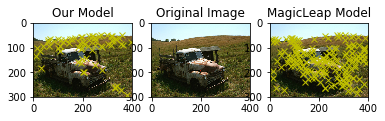

COCO_test2014_000000000275.jpg


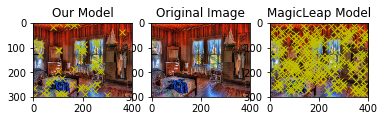

COCO_test2014_000000000427.jpg


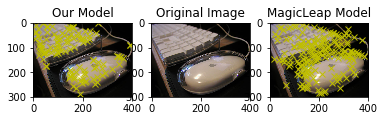

COCO_test2014_000000000188.jpg


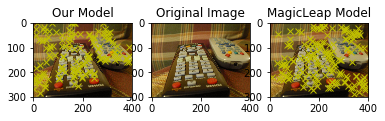

COCO_test2014_000000000463.jpg


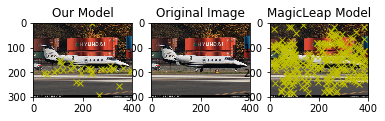

COCO_test2014_000000000408.jpg


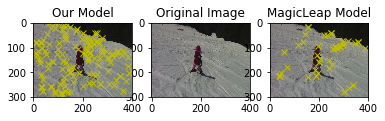

COCO_test2014_000000000457.jpg


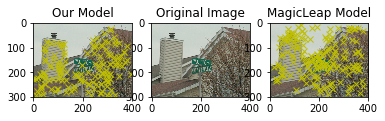

COCO_test2014_000000000403.jpg


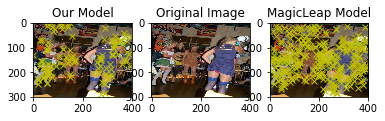

COCO_test2014_000000000251.jpg


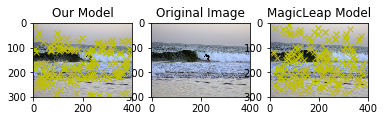

COCO_test2014_000000000461.jpg


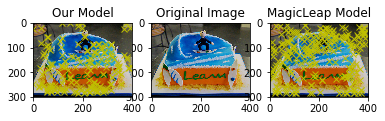

COCO_test2014_000000000245.jpg


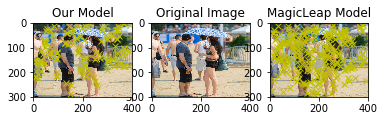

COCO_test2014_000000000184.jpg


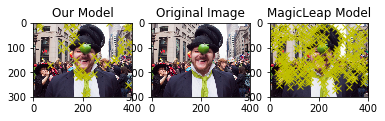

In [21]:
# parameter 
threshold = 0.05
# load in model
magic_leap_model = SuperPointNet()
model = torch.load('./Fri Nov  9 15:54:21 2018/e_405_a_10.9042.model')
magic_leap_model.load_state_dict(torch.load('superpoint_v1.pth'))

# put on device
DEVICE = 'cuda'
model = model.to(DEVICE)
magic_leap_model.to(DEVICE)

model.eval()
magic_leap_model.eval()

criterion = nn.Softmax(dim=1) #reduction='elementwise_sum')
cross_comparison('../test_coco/', model, 'Our Model', magic_leap_model, 'MagicLeap Model', threshold)

qc_left_br_038_1481830525.62.png


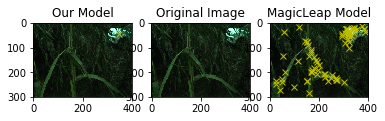

qc_left_tr_005_1481830508.27.png


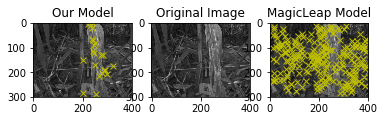

vc_left_015_1481830513.55.png


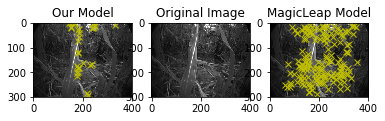

vc_left_019_1481830515.64.png


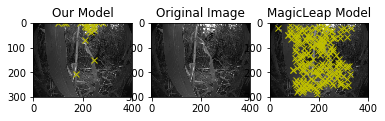

vc_right_042_1481830527.72.png


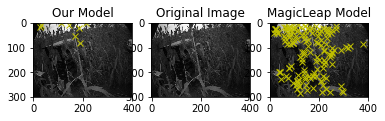

qc_left_tl_021_1481830516.67.png


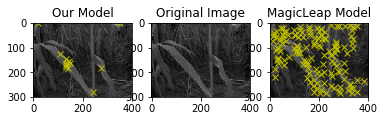

qc_left_br_030_1481830521.45.png


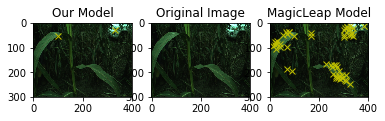

qc_left_tl_012_1481830511.95.png


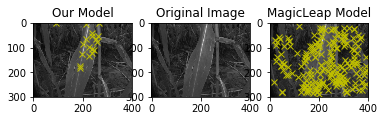

qc_left_br_023_1481830517.76.png


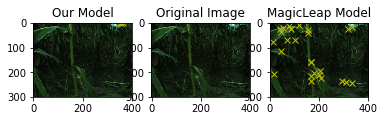

vc_right_031_1481830521.93.png


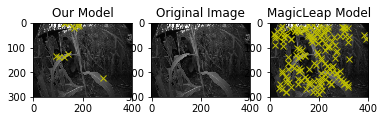

qc_left_tl_024_1481830518.23.png


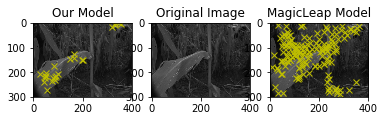

qc_left_tr_011_1481830511.42.png


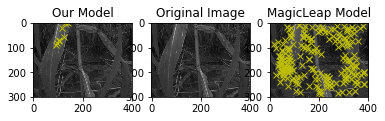

In [20]:
cross_comparison('../tesrt/', model, 'Our Model', magic_leap_model, 'MagicLeap Model', threshold)